In [1]:
import seaborn as sns
import pandas as pd
from google.colab import files
clusteringbaru=files.upload()

Saving clusteringbaru.csv to clusteringbaru.csv


In [ ]:
clusteringbaru

{'clusteringbaru.csv': b'NO,KECAMATAN,POSITIF,TENAGA_MEDIS,JUMLAH_PENDUDUK\r\n1,AMPELGADING,4,44,54456\r\n2,BANTUR,2,28,33549\r\n3,BULULAWANG,31,42,70675\r\n4,DAMPIT,15,52,66084\r\n5,DAU,36,44,69912\r\n6,DONOMULYO,10,56,63777\r\n7,GEDANGAN,4,39,53652\r\n8,GONDANGLEGI,10,34,48183\r\n9,JABUNG,16,50,73896\r\n10,KALIPARE,8,37,62581\r\n11,KARANGPLOSO,50,43,77546\r\n12,KASEMBON,0,32,31133\r\n13,KEPANJEN,48,55,105960\r\n14,KROMENGAN,10,26,39132\r\n15,LAWANG,106,83,106631\r\n16,NGAJUM,8,39,49657\r\n17,NGANTANG,12,34,57769\r\n18,PAGAK,4,28,29129\r\n19,PAGELARAN,9,32,67659\r\n20,PAKIS,83,51,138849\r\n21,PAKISAJI,48,50,85049\r\n22,PONCOKUSUMO,7,50,94792\r\n23,PUJON,13,36,67489\r\n24,SBR MJG WETAN,8,39,54531\r\n25,SINGOSARI,203,42,93442\r\n26,SUMBERPUCUNG,7,56,53088\r\n27,TAJINAN,17,38,53629\r\n28,TIRTOYUDO,2,43,61718\r\n29,TUMPANG,18,64,76863\r\n30,TUREN,13,54,115488\r\n31,WAGIR,27,36,82742\r\n32,WAJAK,13,46,82197\r\n33,WONOSARI,2,28,42119\r\n'}

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
KabMalang = pd.read_csv('clusteringbaru.csv')
KabMalang.head(20)
#KabMalang.info()

,NO,KECAMATAN,POSITIF,TENAGA_MEDIS,JUMLAH_PENDUDUK
0,1,AMPELGADING,4,44,54456
1,2,BANTUR,2,28,33549
2,3,BULULAWANG,31,42,70675
3,4,DAMPIT,15,52,66084
4,5,DAU,36,44,69912
5,6,DONOMULYO,10,56,63777
6,7,GEDANGAN,4,39,53652
7,8,GONDANGLEGI,10,34,48183
8,9,JABUNG,16,50,73896
9,10,KALIPARE,8,37,62581


In [4]:
#Menghapus dua kolom dan menyimpan data ke DataFrame baru
KabMalang = KabMalang.drop(['NO','KECAMATAN','JUMLAH_PENDUDUK'], axis=1)
KabMalang.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   POSITIF       33 non-null     int64
 1   TENAGA_MEDIS  33 non-null     int64
dtypes: int64(2)
memory usage: 656.0 bytes


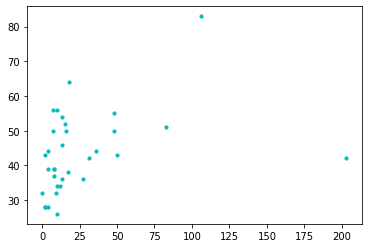

In [5]:
#Plotting Data Ke Diagram Scatter
plt.scatter(KabMalang.POSITIF, KabMalang.TENAGA_MEDIS, s =10, c = 'c', marker = 'o', alpha = 1)
plt.show()

In [6]:
#Menentukan variable yang akan dikelompokkan
KabMalang_knn = KabMalang.iloc[:, 0:2]
KabMalang_knn.head(34)

,POSITIF,TENAGA_MEDIS
0,4,44
1,2,28
2,31,42
3,15,52
4,36,44
5,10,56
6,4,39
7,10,34
8,16,50
9,8,37


In [7]:
#Mengubah variable data frame menjadi array sebelum menentukan nilai K.
x_array = np.array(KabMalang_knn)
#print(x_array)

In [8]:
#Menstandarkan kembali ukuran variable array.
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

In [9]:
#Menentukan dan konfigurasi fungsi k-means
kmeans = KMeans(n_clusters=3, random_state=123)

In [10]:
#Menentukan nilai K (cluster) dari data
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [11]:
#Menambahkan kolom cluster dalam data frame
KabMalang_knn['kluster'] = kmeans.labels_
print(KabMalang_knn)

    POSITIF  TENAGA_MEDIS  kluster
0         4            44        1
1         2            28        0
2        31            42        1
3        15            52        1
4        36            44        1
5        10            56        1
6         4            39        0
7        10            34        0
8        16            50        1
9         8            37        0
10       50            43        1
11        0            32        0
12       48            55        1
13       10            26        0
14      106            83        2
15        8            39        0
16       12            34        0
17        4            28        0
18        9            32        0
19       83            51        2
20       48            50        1
21        7            50        1
22       13            36        0
23        8            39        0
24      203            42        2
25        7            56        1
26       17            38        0
27        2         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


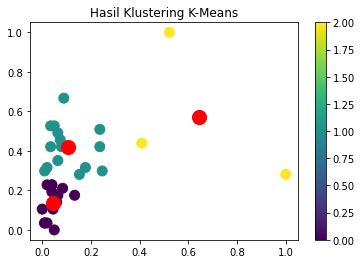

In [12]:
#MemVisualisasikan hasil cluster
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = KabMalang_knn.kluster, marker = 'o', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title('Hasil Klustering K-Means')
plt.colorbar (output)
plt.show()